<a href="https://colab.research.google.com/github/fereol023/ML-algorithms-on-ad-data/blob/Unsupervised/Unsupervised_PCA_on_advertisement_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importation, décodage et lecture du dataset des images publicitaires depuis mon répertoire github (lien raw). 

In [ ]:
import pandas as pd
import requests
import io

url = "https://github.com/fereol023/ML-algorithms-on-ad-data/blob/main/ad_data.csv?raw=true"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode()), delimiter = ",", index_col = None)

print(df.head())
df.shape

target = "class"
y = df.loc[:, target] 
X = df.loc[:, df.columns != target]

In [95]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [99]:
import matplotlib.pyplot as plt

Train test split, Normalisation

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# encodage
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

# standardisation
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=8/10)

[0 0 0 ... 1 1 1]
[[ 1.4355604   0.09446502 -0.33658793 ... -0.11662434 -0.09927362
  -0.0390792 ]
 [ 0.19374237  2.7200555   0.99231548 ... -0.11662434 -0.09927362
  -0.0390792 ]
 [-0.24454635  0.89821721  0.76361619 ... -0.11662434 -0.09927362
  -0.0390792 ]
 ...
 [-0.42716665  0.0561911   0.44066529 ... -0.11662434 -0.09927362
  -0.0390792 ]
 [-0.84719333 -0.86238283 -0.52088908 ... -0.11662434 -0.09927362
  -0.0390792 ]
 [-0.11671214 -0.55619152 -0.33658793 ... -0.11662434 -0.09927362
  -0.0390792 ]]


Pte 1 : apprentissage non supervisé : PCA

(2623, 3)


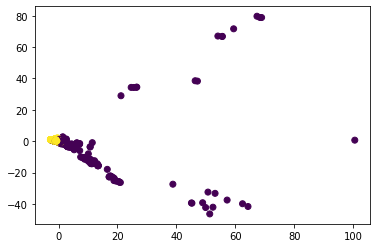

In [83]:
from sklearn.decomposition import PCA

classifier = PCA(n_components=3)
composantes = classifier.fit_transform(X_train)

print(composantes.shape)
plt.scatter(composantes[:,0], composantes[:,1], c=y_train)

In [84]:
composantes

array([[-0.81564868,  0.2448462 , -0.25067018],
       [-1.02324997,  0.34914596, -0.53070332],
       [-0.15626809, -0.17042184, -0.09194946],
       ...,
       [-0.63308113,  0.17828876, -0.14486606],
       [-0.7739755 ,  0.18590001, -0.31321163],
       [-0.78304063,  0.23029883, -0.2758463 ]])

Pour la selection de variables ou la réduction de dimensions, on fait un PCA avec un nombre de composantes principales attendu égal au nombre de features de départ. 

PCA : réduction de dimension : travailelr avec le nuage de variables 

In [85]:
classifier_var = PCA(n_components=1558) # nbre de features au départ
X_reduced_var = classifier_var.fit_transform(X_train)

467

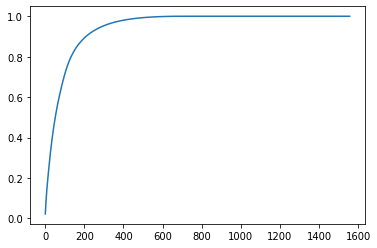

In [86]:
import numpy as np
# le cumul des variances par ordre croissant des axes importants
np.cumsum(classifier_var.explained_variance_ratio_)

# on va alors chercher l'index de la composante au niveau 
# duquel on se retrouve entre 95% et 99% de variance
plt.plot(np.cumsum(classifier_var.explained_variance_ratio_))
np.argmax(np.cumsum(classifier_var.explained_variance_ratio_)>0.99)